In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape
df.size
df.info()

(1338, 7)

9366

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Cleaning

## checking duplicates

In [6]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.drop(['index'],axis=1,inplace=True)

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


# Missing Values

In [12]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1332,False,False,False,False,False,False,False
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Identify currupted data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# Out liers

In [15]:
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

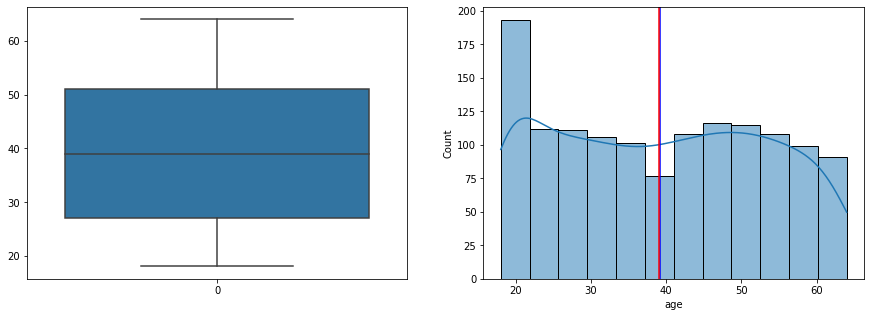

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.age)

plt.subplot(122)
sns.histplot(df.age,kde=True)
plt.axvline(df.age.mean(), color='blue')
plt.axvline(df.age.median(),color='red');

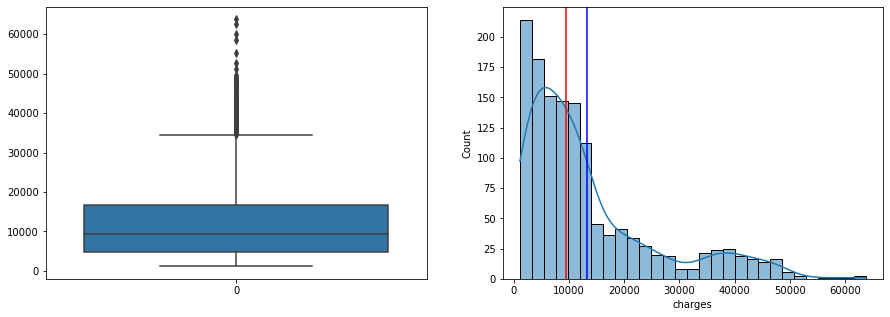

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.charges)

plt.subplot(122)
sns.histplot(df.charges,kde=True)
plt.axvline(df.charges.mean(), color='blue')
plt.axvline(df.charges.median(),color='red');

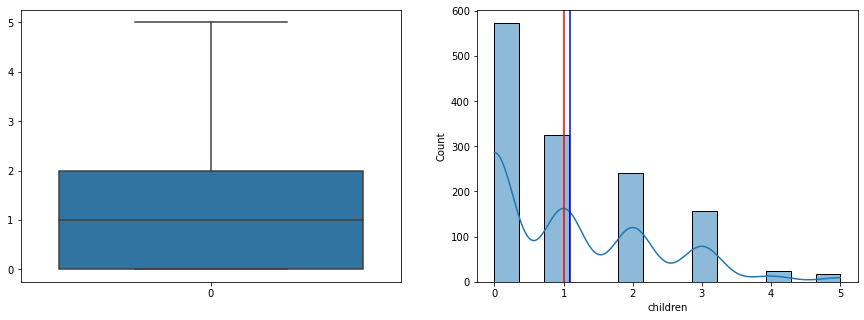

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.children)

plt.subplot(122)
sns.histplot(df.children,kde=True)
plt.axvline(df.children.mean(), color='blue')
plt.axvline(df.children.median(),color='red');

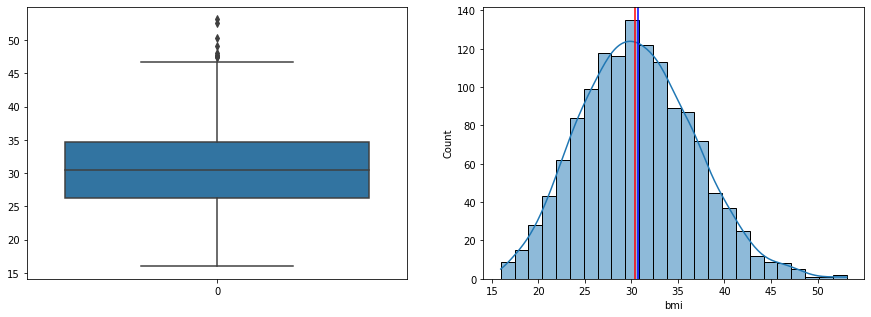

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.bmi)

plt.subplot(122)
sns.histplot(df.bmi,kde=True)
plt.axvline(df.bmi.mean(), color='blue')
plt.axvline(df.bmi.median(),color='red');

# Analysis

In [20]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


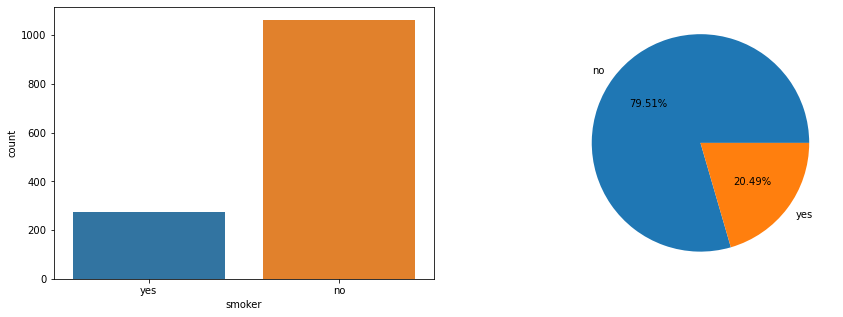

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.smoker)
plt.subplot(122)
plt.pie(df.smoker.value_counts().values,labels=df.smoker.value_counts().index,autopct='%.2f%%');

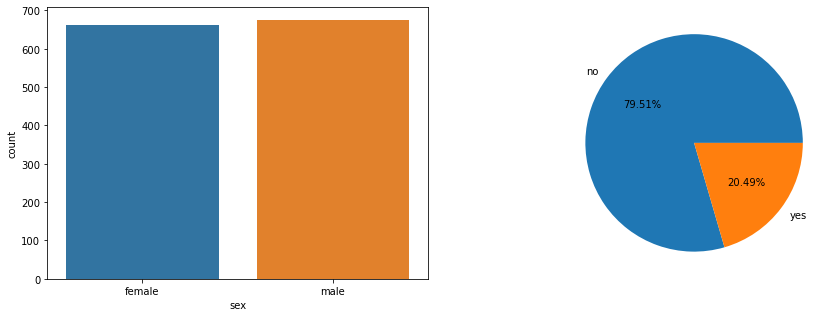

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.sex)
plt.subplot(122)
plt.pie(df.smoker.value_counts().values,labels=df.smoker.value_counts().index,autopct='%.2f%%');

<AxesSubplot:xlabel='age', ylabel='charges'>

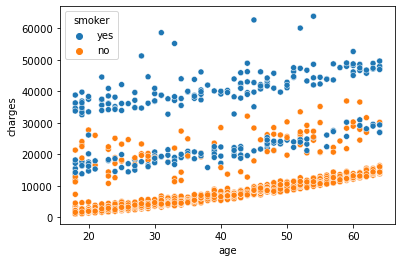

In [23]:
sns.scatterplot(x=df.age,y=df.charges,hue=df.smoker)

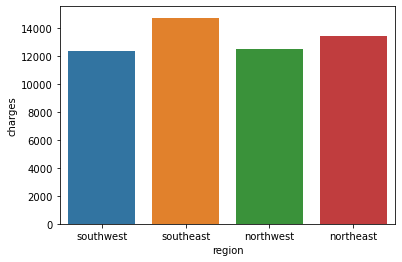

In [24]:
sns.barplot(x=df.region,y=df.charges,ci=False);

<AxesSubplot:>

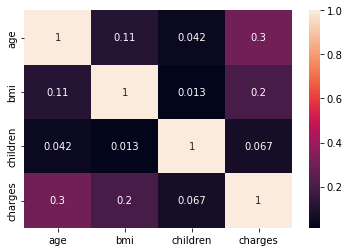

In [25]:
sns.heatmap(df.corr(),annot=True)

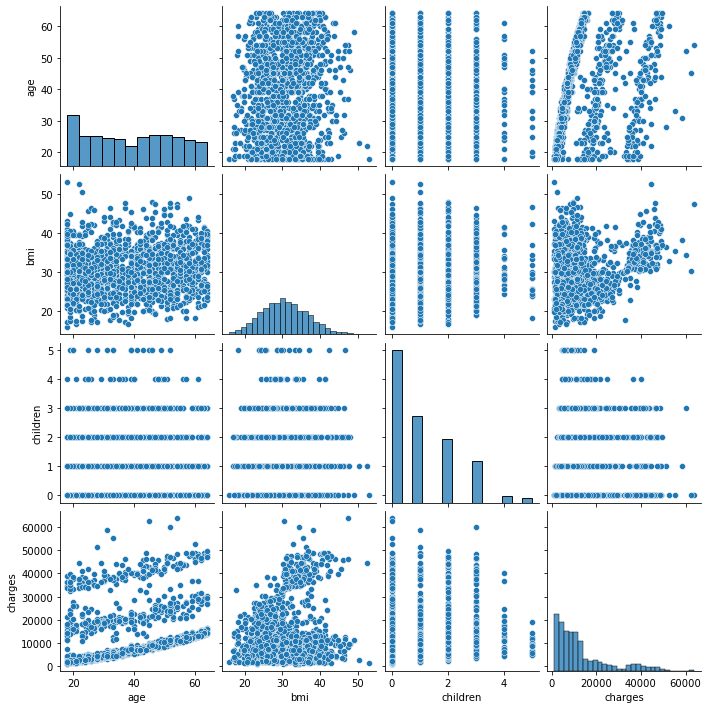

In [26]:
sns.pairplot(df);

# Data Preparation

## a.Identify the Target Variable and Splitting the Data into Train and Test

In [27]:
# install -U scikit-learn
import sklearn

print(sklearn.__version__)

1.2.1


In [28]:
# Identifying the inouts(X) and ouput(y)
y=df['charges']
X=df[['age','sex','bmi','children','smoker','region']]

In [29]:
# Data-preprocessing: Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 50)

In [30]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
976,26,male,29.15,1,no,southeast
369,18,male,30.40,3,no,northeast
1315,19,female,20.60,0,no,southwest
821,18,female,31.13,0,no,southeast


In [31]:
print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


## b. Separating Categorical and Numerical Columns:

In [32]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
976,26,male,29.15,1,no,southeast
369,18,male,30.40,3,no,northeast
1315,19,female,20.60,0,no,southwest
821,18,female,31.13,0,no,southeast


In [33]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
560,female,no,northwest
976,male,no,southeast
369,male,no,northeast
1315,female,no,southwest
821,female,no,southeast


In [34]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])

X_train_num.head()

,age,bmi,children
560,46,19.95,2
976,26,29.15,1
369,18,30.40,3
1315,19,20.60,0
821,18,31.13,0


## c. Scaling the Numerical Features

In [35]:
X_train_num.head()

,age,bmi,children
560,46,19.95,2
976,26,29.15,1
369,18,30.40,3
1315,19,20.60,0
821,18,31.13,0


In [36]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)
X_train_num_rescaled.head()

,age,bmi,children
560,0.516122,-1.741735,0.781581
976,-0.905607,-0.247800,-0.058702
369,-1.474299,-0.044819,1.621865
1315,-1.403212,-1.636185,-0.898986
821,-1.474299,0.073721,-0.898986


In [37]:
X_train_num.describe()

,age,bmi,children
count,1002.000000,1002.000000,1002.000000
mean,38.739521,30.676008,1.069860
std,14.074407,6.161307,1.190669
min,18.000000,15.960000,0.000000
25%,26.000000,26.336250,0.000000
50%,39.000000,30.300000,1.000000
75%,51.000000,34.800000,2.000000
max,64.000000,53.130000,5.000000


## d. Applying OnHotEncoding on Categorical Columns

In [38]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,sex,smoker,region
560,female,no,northwest
976,male,no,southeast
369,male,no,northeast
1315,female,no,southwest
821,female,no,southeast


In [39]:
X_train_cat['sex'].value_counts(normalize=True)

male      0.523952
female    0.476048
Name: sex, dtype: float64

In [40]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.794411
yes    0.205589
Name: smoker, dtype: float64

In [41]:
X_train_cat['region'].value_counts(normalize=True)

southeast    0.273453
northeast    0.252495
southwest    0.239521
northwest    0.234531
Name: region, dtype: float64

In [42]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.0,0.0,1.0,0.0,0.0
976,1.0,0.0,0.0,1.0,0.0
369,1.0,0.0,0.0,0.0,0.0
1315,0.0,0.0,0.0,0.0,1.0
821,0.0,0.0,0.0,1.0,0.0


## f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [43]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.516122,-1.741735,0.781581,0.0,0.0,1.0,0.0,0.0
976,-0.905607,-0.247800,-0.058702,1.0,0.0,0.0,1.0,0.0
369,-1.474299,-0.044819,1.621865,1.0,0.0,0.0,0.0,0.0
1315,-1.403212,-1.636185,-0.898986,0.0,0.0,0.0,0.0,1.0
821,-1.474299,0.073721,-0.898986,0.0,0.0,0.0,1.0,0.0


## g.Preparing test Data

In [44]:
X_test.head()

,age,sex,bmi,children,smoker,region
1105,49,female,29.925,0,no,northwest
1267,20,female,33.300,0,no,southwest
287,63,female,26.220,0,no,northwest
232,19,female,17.800,0,no,southwest
848,55,male,32.775,0,no,northwest


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 1105 to 936
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [46]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,sex,smoker,region
1105,female,no,northwest
1267,female,no,southwest
287,female,no,northwest
232,female,no,southwest
848,male,no,northwest


In [47]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,age,bmi,children
1105,49,29.925,0
1267,20,33.300,0
287,63,26.220,0
232,19,17.800,0
848,55,32.775,0


In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder_=OneHotEncoder(drop='first',sparse=False)

X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1105,0.0,0.0,1.0,0.0,0.0
1267,0.0,0.0,0.0,0.0,1.0
287,0.0,0.0,1.0,0.0,0.0
232,0.0,0.0,0.0,0.0,1.0
848,1.0,0.0,1.0,0.0,0.0


In [49]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)
X_test_num_rescaled.head()

,age,bmi,children
1105,0.729381,-0.121952,-0.898986
1267,-1.332126,0.426095,-0.898986
287,1.724591,-0.723586,-0.898986
232,-1.403212,-2.090861,-0.898986
848,1.155899,0.340843,-0.898986


In [50]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1105,0.729381,-0.121952,-0.898986,0.0,0.0,1.0,0.0,0.0
1267,-1.332126,0.426095,-0.898986,0.0,0.0,0.0,0.0,1.0
287,1.724591,-0.723586,-0.898986,0.0,0.0,1.0,0.0,0.0
232,-1.403212,-2.090861,-0.898986,0.0,0.0,0.0,0.0,1.0
848,1.155899,0.340843,-0.898986,1.0,0.0,1.0,0.0,0.0


# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [52]:
y_test_pred = regressor.predict(X_test_transformed)

In [53]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1105,8988.15875,10650.890426
1267,1880.48700,3877.701128
287,14256.19280,13018.684616
232,1727.78500,-1326.987052
848,10601.63225,13094.704947


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

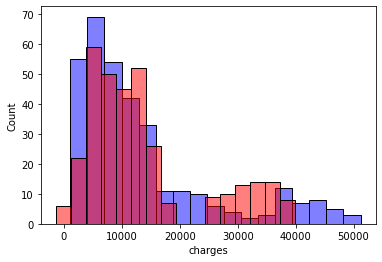

In [54]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [55]:
from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_LR)
print('Mean Squared Error: ',MeanSquaredError_LR )
print('Root Mean Squared Error: ',RootMeanSquaredError_LR)

Mean Absolute Error:  3826.3932281803036
Mean Squared Error:  29921619.63837005
Root Mean Squared Error:  5470.06578007706


# KNN Regression

In [56]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [57]:
y_test_pred = regressor.predict(X_test_transformed)

In [58]:
temp_df= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

temp_df.head()

,Actual,Predicted
1105,8988.15875,9745.370880
1267,1880.48700,3896.274266
287,14256.19280,11920.753080
232,1727.78500,2376.451000
848,10601.63225,10771.891630


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

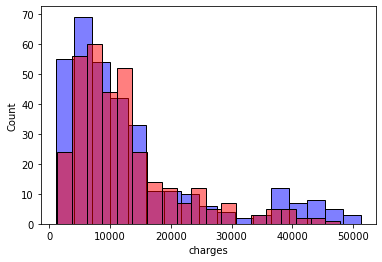

In [59]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [60]:
MeanAbsoluteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_KNN)
print('Mean Squared Error: ',MeanSquaredError_KNN)
print('Root Mean Squared Error: ',RootMeanSquaredError_KNN)

Mean Absolute Error:  3667.252794733731
Mean Squared Error:  36322350.22169309
Root Mean Squared Error:  6026.802653289146


# Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [62]:
y_test_pred = regressor.predict(X_test_transformed)

In [63]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

temp_df.head()

,Actual,Predicted
1105,8988.15875,25656.57526
1267,1880.48700,1748.77400
287,14256.19280,13770.09790
232,1727.78500,1728.89700
848,10601.63225,10231.49990


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

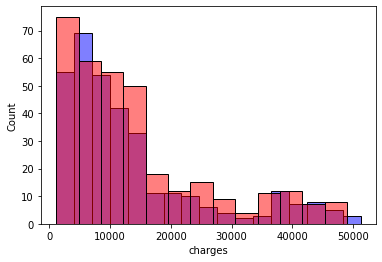

In [64]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [65]:
MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_DTR)
print('Mean Squared Error: ',MeanSquaredError_DTR)
print('Root Mean Squared Error: ',RootMeanSquaredError_DTR )

Mean Absolute Error:  2889.781016298507
Mean Squared Error:  39416343.017812185
Root Mean Squared Error:  6278.243625235658


# Random Forest Regression

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [67]:
y_test_pred = regressor.predict(X_test_transformed)

In [68]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
temp_df.head()

,Actual,Predicted
1105,8988.15875,10251.714896
1267,1880.48700,5989.210592
287,14256.19280,13987.267590
232,1727.78500,1753.796362
848,10601.63225,11651.705497


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

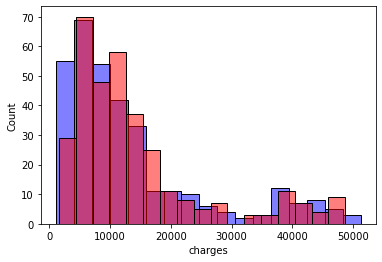

In [69]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [70]:
MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR =  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_RFR )
print('Mean Squared Error: ',MeanSquaredError_RFR)
print('Root Mean Squared Error: ',RootMeanSquaredError_RFR)

Mean Absolute Error:  2482.662983061294
Mean Squared Error:  16132341.940274945
Root Mean Squared Error:  4016.5086754885697


## Gradient Decision Boosting Tree

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed,y_train)

GradientBoostingRegressor()

In [72]:
y_test_pred = regressor.predict(X_test_transformed)

In [73]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
temp_df.head()

,Actual,Predicted
1105,8988.15875,10496.288236
1267,1880.48700,2597.122624
287,14256.19280,13788.834213
232,1727.78500,4093.871988
848,10601.63225,12319.586136


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

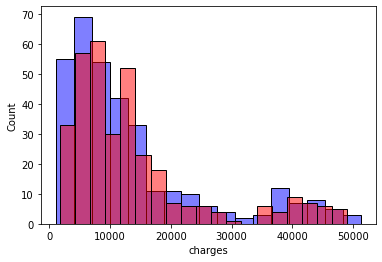

In [74]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [75]:
MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_GBDT)
print('Mean Squared Error: ',MeanSquaredError_GBDT)
print('Root Mean Squared Error: ',RootMeanSquaredError_GBDT)

Mean Absolute Error:  2261.538578551518
Mean Squared Error:  13982506.437113341
Root Mean Squared Error:  3739.3189803911273


In [76]:
data=[['Logistic Regression',MeanAbsoluteError_LR],
      ['KNN Regression',MeanAbsoluteError_KNN ],
     ['Decision Tree Regression',MeanAbsoluteError_DTR],
     ['Random Forest Regression',MeanAbsoluteError_RFR ],
     ['Gradient Boosting Tree',MeanAbsoluteError_GBDT]]
result=pd.DataFrame(data,columns = ['Algorithms','Mean Absolute Error'])

In [77]:
result

,Algorithms,Mean Absolute Error
0,Logistic Regression,3826.393228
1,KNN Regression,3667.252795
2,Decision Tree Regression,2889.781016
3,Random Forest Regression,2482.662983
4,Gradient Boosting Tree,2261.538579


## conclusion

* By observing all the algorithms GBDT(Gradient Boosting Decision Tree)is best model to predict medical insurance charges.
* Because GBDT algorithm giving less mean absolute error which is 2261.5